Math A7800: Homework 3

Name: Jorge Monzon Diaz

Email: jorgemd503@gmail.com

## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

\pagebreak
# Exercise 4.23

Consider the annual rates of return (including dividends) on the Dow-Jones industrial average for the years 1996-2005. These data, multiplied by 100, are:

In [2]:
x = pd.read_excel (r'hw3.xlsx', sheet_name='data 423')
x.index += 1 
print (x)

      X
1  -0.6
2   3.1
3  25.3
4 -16.8
5  -7.1
6  -6.2
7  25.2
8  22.6
9  26.0


## (a) Construct a Q-Q plot. Does the data seem normally distributed?

   x_(j)     q_(j)
1  -16.8 -1.593219
2   -7.1 -0.967422
3   -6.2 -0.589456
4   -0.6 -0.282216
5    3.1  0.000000
6   22.6  0.282216
7   25.2  0.589456
8   25.3  0.967422
9   26.0  1.593219


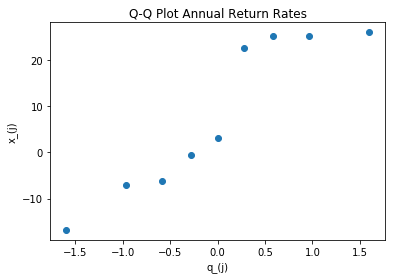

In [3]:
x = pd.read_excel (r'hw3.xlsx', sheet_name='data 423')

#order x_j
x_j=x.sort_values(by=['X']).reset_index(drop=True)

#calculate q_j
q=stats.norm.ppf(np.linspace((1-.5)/9,(9-.5)/9,9))
q = pd.DataFrame({'q_(j)': q})

#create data table
data=pd.concat([x_j,q], axis=1)
data.columns=['x_(j)','q_(j)']
data.index += 1 
print(data)

#make q-q plot
plt.scatter(data['q_(j)'],data['x_(j)'])
plt.title("Q-Q Plot Annual Return Rates")
plt.xlabel("q_(j)")
plt.ylabel("x_(j)")
plt.show()

This data does not seem normally distributed. It does not seem to follow a straight, linear, trendline.

## (b) Carry out a test of normality based on the correlation coefficient $r_{Q}$. Let the significance level be $\alpha =.1$

$$r_Q=\frac{\sum_{j=1}^9(x_{(j)}-\bar{x})(q_{(j)}-\bar{q})}{\sqrt{\sum_{j=1}^9(x_{(j)}-\bar{x})^2} \sqrt{\sum_{j=1}^9(q_{(j)}-\bar{q})^2}}$$

In [4]:
print("r_Q:",data['x_(j)'].corr(data['q_(j)']))

r_Q: 0.9351453282719002


From table 4.2, $n=10$, $\alpha=.10$ so the critical point $=.9351$. Since $r_{Q}\nless$ the critical point we fail to reject the hypothesis of normality.

\pagebreak

# Excercise 4.24

Excercise 1.4 contains data on three variables for the world's largest 10 companies as of April 2005. For the sales and profits data:

## (a) Construct Q-Q plots. Do these data appear normally distributed?

Sales (x1)
                     x1_(j)     q_(j)
Company                              
HSBC Group            62.97 -1.644854
Bank of America       65.45 -1.036433
ING Group             92.01 -0.674490
American Intl Group   95.04 -0.385320
Citigroup            108.28 -0.125661
General Electric     152.36  0.125661
Toyota Motor         165.68  0.385320
Exxon Mobile         263.99  0.674490
Royal Dutch/Shell    265.19  1.036433
BP                   285.06  1.644854


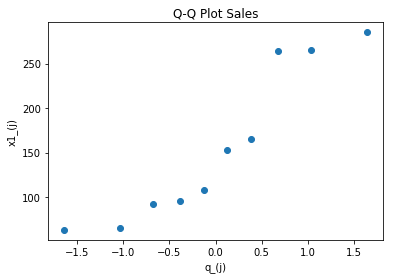

Profits (x2)
                     x2_(j)     q_(j)
Company                              
ING Group              8.10 -1.644854
HSBC Group             9.52 -1.036433
American Intl Group   10.91 -0.674490
Toyota Motor          11.13 -0.385320
Bank of America       14.14 -0.125661
BP                    15.73  0.125661
General Electric      16.59  0.385320
Citigroup             17.05  0.674490
Royal Dutch/Shell     18.54  1.036433
Exxon Mobile          25.33  1.644854


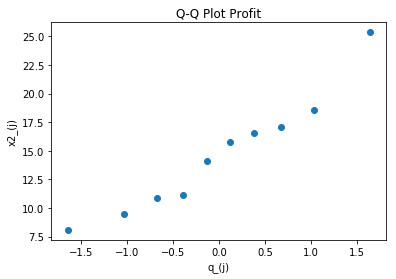

In [5]:
x = pd.read_excel (r'hw3.xlsx', sheet_name='data 424').set_index('Company')

#order sales (x1)
x1_j=x['sales (x1)'].sort_values()

#order profits (x2)
x2_j=x['profits (x2)'].sort_values()

#calculate q_j
q=stats.norm.ppf(np.linspace((1-.5)/10,(10-.5)/10,10))
q = pd.DataFrame({'q_(j)': q})

#create data table for sales
print("Sales (x1)")
q=q.set_index(x1_j.index)
data1=pd.concat([x1_j,q], axis=1)
data1.columns=['x1_(j)','q_(j)']
print(data1)

#make q-q plot sales
plt.scatter(data1['q_(j)'],data1['x1_(j)'])
plt.title("Q-Q Plot Sales")
plt.xlabel("q_(j)")
plt.ylabel("x1_(j)")
plt.show()


#create data table for profits
print("Profits (x2)")
q=q.set_index(x2_j.index)
data2=pd.concat([x2_j,q], axis=1)
data2.columns=['x2_(j)','q_(j)']
print(data2)

#make q-q plot profits
plt.scatter(data2['q_(j)'],data2['x2_(j)'])
plt.title("Q-Q Plot Profit")
plt.xlabel("q_(j)")
plt.ylabel("x2_(j)")
plt.show()

The Q-Q Plot for Sales does not seem normal, the data is not visibly linear. As to Profits, the trendline seems potentially linear except there is an outlier point on the top right.

## (b) Carry out a test of normality based on the correlation coefficient $r_{Q}$. Let the significance level be $\alpha =.1$.

$$r_Q=\frac{\sum_{j=1}^{10}(x_{(j)}-\bar{x})(q_{(j)}-\bar{q})}{\sqrt{\sum_{j=1}^{10}(x_{(j)}-\bar{x})^2} \sqrt{\sum_{j=1}^{10}(q_{(j)}-\bar{q})^2}}$$

In [6]:
print("Sales correlation coefficient:",data1['x1_(j)'].corr(data1['q_(j)']))

print("Profits correlation coefficient:",data2['x2_(j)'].corr(data2['q_(j)']))

Sales correlation coefficient: 0.9371850260956385
Profits correlation coefficient: 0.969164496800138


From table 4.2, $n=10$, $\alpha=.10$ so the critical point $=.9351$. 

Since both the correlation for sales and for profits are $>.9351$ we fail to reject the hypothesis of normality for either.

\pagebreak

# Exercise 4.25

Refer to the data for the world's 10 largest companies in Exercise 1.4. Construct a chi-square plot using all three variables. The chi square-quantiles are:

In [7]:
q = pd.DataFrame({'q_(j)': [.3518,.7978,1.2125,1.6416,2.1095,2.6430,3.2831,4.1083,5.3170,7.8147]})
q.index += 1 
print(q)

     q_(j)
1   0.3518
2   0.7978
3   1.2125
4   1.6416
5   2.1095
6   2.6430
7   3.2831
8   4.1083
9   5.3170
10  7.8147


In [8]:
xmean=x.mean(axis = 0) 
print("x-mean:")
print(xmean)

X=x.to_numpy()
print("\nX:")
print(X)

x-mean:
sales (x1)      155.603
profits (x2)     14.704
assets (x3)     710.911
dtype: float64

X:
[[ 108.28   17.05 1484.1 ]
 [ 152.36   16.59  750.33]
 [  95.04   10.91  766.42]
 [  65.45   14.14 1110.46]
 [  62.97    9.52 1031.29]
 [ 263.99   25.33  195.26]
 [ 265.19   18.54  193.83]
 [ 285.06   15.73  191.11]
 [  92.01    8.1  1175.16]
 [ 165.68   11.13  211.15]]


$$S=\frac{1}{n-1}(\bf{X-1\bar{x}^T})^T(\bf{X-1\bar{x}^T})$$

In [9]:
R=X-np.ones((10,1))*[155.603,14.704,710.911]
S=1/9*(np.matmul(R.transpose(),R))

print('S:')
print(S)

invS=np.linalg.inv(S)
print('\nS^(-1):')
print(invS)

S:
[[ 7.47645325e+03  3.03618620e+02 -3.55759596e+04]
 [ 3.03618620e+02  2.61903156e+01 -1.05382739e+03]
 [-3.55759596e+04 -1.05382739e+03  2.37054270e+05]]

S^(-1):
[[ 8.66968588e-04 -5.86425609e-03  1.04040842e-04]
 [-5.86425609e-03  8.61660751e-02 -4.97026977e-04]
 [ 1.04040842e-04 -4.97026977e-04  1.76228512e-05]]


$$d_j^2=(\bf{x_j-\bar{x}})^T S^{-1}(\bf{x_j-\bar{x}})$$

       d_j^2
1   4.836446
2   0.314226
3   1.289437
4   2.019492
5   1.407266
6   4.909046
7   1.641814
8   4.352026
9   3.041105
10  3.189140


     d_(j)^2   q_(j)
1   0.314226  0.3518
2   1.289437  0.7978
3   1.407266  1.2125
4   1.641814  1.6416
5   2.019492  2.1095
6   3.041105  2.6430
7   3.189140  3.2831
8   4.352026  4.1083
9   4.836446  5.3170
10  4.909046  7.8147


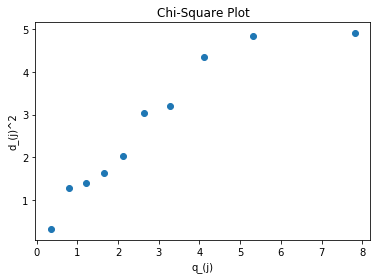

In [10]:
#compute expectation
exp=np.array([x['sales (x1)'][:]-xmean['sales (x1)'],x['profits (x2)'][:]-xmean['profits (x2)'],x['assets (x3)'][:]-xmean['assets (x3)']])

#transpose
exptr=exp.transpose()

#compute d_j^2 following the formula used above
sqdist=list(map(lambda i: np.matmul(np.matmul(exptr[i,:],invS),exp[:,i]), np.arange(10)))
sqdist = pd.DataFrame({'d_j^2': sqdist})
sqdist.index += 1 
print(sqdist)

#order d_(j)^2
sqdist=sqdist.sort_values(by=['d_j^2']).reset_index(drop=True)

#create data table
q=q.reset_index(drop=True)
data=pd.concat([sqdist,q], axis=1)
data.columns=['d_(j)^2','q_(j)']
data.index += 1 
print("\n")
print(data)

#make q-q plot
plt.scatter(data['q_(j)'],data['d_(j)^2'])
plt.title("Chi-Square Plot")
plt.xlabel("q_(j)")
plt.ylabel("d_(j)^2")
plt.show()

\pagebreak

# Exercise 4.28

Consider the air-pollution data given in Table 1.5. Construct a Q-Q plot for the solar radiation measurements and carry out a test for normality based on the correlation coefficient $r_Q$. Let $\alpha=.05$ and use the entry corresponding to $n=40$ in Table 4.2.

(Table not included due to space constraints)

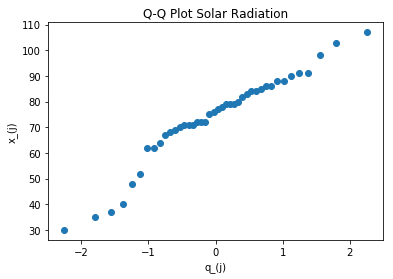

In [11]:
x = pd.read_excel (r'hw3.xlsx', sheet_name='data 428')

#order x_j
x_j=x.sort_values(by=['x2']).reset_index(drop=True)

#calculate q_j
q=stats.norm.ppf(np.linspace((1-.5)/42,(42-.5)/42,42))
q = pd.DataFrame({'q_(j)': q})

#create data table
data=pd.concat([x_j,q], axis=1)
data.columns=['x_(j)','q_(j)']

#make q-q plot
plt.scatter(data['q_(j)'],data['x_(j)'])
plt.title("Q-Q Plot Solar Radiation")
plt.xlabel("q_(j)")
plt.ylabel("x_(j)")
plt.show()

In [12]:
print("solar radiation correlation coefficient:",data['x_(j)'].corr(data['q_(j)']))

solar radiation correlation coefficient: 0.9693258131891779


Since the critical value for $n=40$, $\alpha=.05$, is $.9726$ and $r_Q=.9693$ we reject the hypothesis of normality at $\alpha=.05$.

\pagebreak

# Exercise 4.30

Consider the used-car data in exercise 4.26

In [13]:
x = pd.read_excel (r'hw3.xlsx', sheet_name='data 430')
x.index += 1 
print(x)

    x1     x2
1    1  18.95
2    2  19.00
3    3  17.95
4    3  15.54
5    4  14.00
6    5  12.95
7    6   8.94
8    8   7.49
9    9   6.00
10  11   3.99


## (a) Determine the power transformation $\hat{\lambda_1}$ that makes the $x_1$ values approximately normal. Construct a Q-Q plot for the transformed data.

    x1_(j)     q_(j)
1        1 -1.644854
2        2 -1.036433
3        3 -0.674490
4        3 -0.385320
5        4 -0.125661
6        5  0.125661
7        6  0.385320
8        8  0.674490
9        9  1.036433
10      11  1.644854


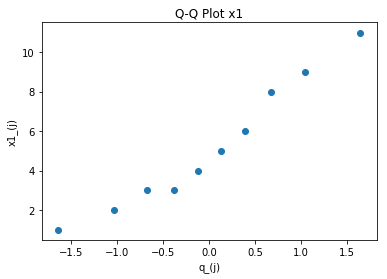

In [14]:
#order x1
x1_j=x['x1'].sort_values()

#calculate q_j
q=stats.norm.ppf(np.linspace((1-.5)/10,(10-.5)/10,10))
q = pd.DataFrame({'q_(j)': q})

#create data table
q=q.set_index(x1_j.index)
data=pd.concat([x1_j,q], axis=1)
data.columns=['x1_(j)','q_(j)']
print(data)

#make q-q plot
plt.scatter(data['q_(j)'],data['x1_(j)'])
plt.title("Q-Q Plot x1")
plt.xlabel("q_(j)")
plt.ylabel("x1_(j)")
plt.show()

In [15]:
print("x1 correlation coefficient:",data['x1_(j)'].corr(data['q_(j)']))

x1 correlation coefficient: 0.9778051227932716


Since the critical value for $n=10$, $\alpha=.1$, is $.9351$ and $r_Q=.9778$ we fail to reject the hypothesis of normality with no transformation needed. Thus $\hat{\lambda_1}=1$.

## (b) Determine the power transformation $\hat{\lambda_2}$ that makes the $x_2$ values approximately normal. Construct a Q-Q plot for the transformed data.

    x2_(j)     q_(j)
10    3.99 -1.644854
9     6.00 -1.036433
8     7.49 -0.674490
7     8.94 -0.385320
6    12.95 -0.125661
5    14.00  0.125661
4    15.54  0.385320
3    17.95  0.674490
1    18.95  1.036433
2    19.00  1.644854


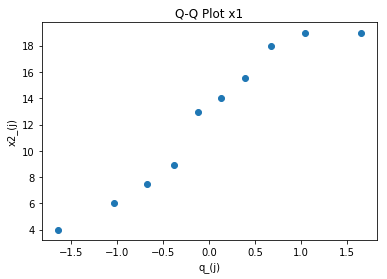

In [16]:
#order x2
x2_j=x['x2'].sort_values()

#create data table
q=q.set_index(x2_j.index)
data=pd.concat([x2_j,q], axis=1)
data.columns=['x2_(j)','q_(j)']
print(data)

#make q-q plot
plt.scatter(data['q_(j)'],data['x2_(j)'])
plt.title("Q-Q Plot x2")
plt.xlabel("q_(j)")
plt.ylabel("x2_(j)")
plt.show()

In [17]:
print("x2 correlation coefficient:",data['x2_(j)'].corr(data['q_(j)']))

x2 correlation coefficient: 0.9679088069188796


Since the critical value for $n=10$, $\alpha=.1$, is $.9351$ and $r_Q=.9679$ we fail to reject the hypothesis of normality with no transformation. Thus $\hat{\lambda_2}=1$.

## (c) Determine the power transformations ${\hat{\lambda}}^T=[\hat{\lambda_1},\hat{\lambda_2}]$ that make the $[x_1, x_2]$ values jointly normal using 4-40. Compare the results with those obtained in Parts a and b.

The log likelihood function $l(\lambda_1,\lambda_2)$ is fairly flat between $\lambda_1$ and $\lambda_2$, which is consistent with the results from parts (a) and (b).

\pagebreak

# Exercise 4.32

Examine the marginal normality of the observations on variables $X_1, X_2,..., X_6$ for the radiotherapy data in Table 1.7. Use whatever methodology, including transformations, you feel is appropriate.

For $\alpha=.05, n=98$, the critical point=.9870

In [18]:
X = pd.read_excel (r'hw3.xlsx', sheet_name='data 432')
X_j=pd.DataFrame(np.sort(X.values, axis=0),columns=X.columns)

#generate q
q=stats.norm.ppf(np.linspace((1-.5)/98,(98-.5)/98,98))
q = pd.DataFrame({'q_(j)': q})

#make table of r_Q
cor = pd.DataFrame(np.array([X_j['x1'].corr(q['q_(j)']), X_j['x2'].corr(q['q_(j)']), X_j['x3'].corr(q['q_(j)']), X_j['x4'].corr(q['q_(j)']), X_j['x5'].corr(q['q_(j)']), X_j['x6'].corr(q['q_(j)'])]),columns=['r_Q'], index=['x1','x2','x3','x4','x5','x6'])
print(cor)

         r_Q
x1  0.984636
x2  0.945260
x3  0.990700
x4  0.980980
x5  0.990572
x6  0.927787


For x3 and x5, we fail to reject the hypothesis of normality because their respective correlation coefficients are higher in value than the critical point.

In order to transform x1, x2, x4, x6 to normality the following parameters should be used (computed by finding their optimal boxcox transformations):

In [19]:
x1=X_j['x1'][X_j['x1']!=0]
print("lambda 1:", stats.boxcox_normmax(x1,method='mle'))

x2=X_j['x2'][X_j['x2']!=0]
print("lambda 2:", stats.boxcox_normmax(x2,method='mle'))

x4=X_j['x4'][X_j['x4']!=0]
print("lambda 4:", stats.boxcox_normmax(x4,method='mle'))

x6=X_j['x6'][X_j['x6']!=0]
print("lambda 6:", stats.boxcox_normmax(x6,method='mle'))

lambda 1: 0.573872302633224
lambda 2: -0.4938785046101076
lambda 4: 0.2344420970433882
lambda 6: -1.4326043401884014


\pagebreak

# Exercise 4.34

Examine the data on bone mineral content in Table 1.8 for marginal and bivariate normality.

For $\alpha=.05, n=25$, the critical point=.9591

In [20]:
X = pd.read_excel (r'hw3.xlsx', sheet_name='data 434')
X_j=pd.DataFrame(np.sort(X.values, axis=0),columns=X.columns)

#generate q
q=stats.norm.ppf(np.linspace((1-.5)/25,(25-.5)/25,25))
q = pd.DataFrame({'q_(j)': q})

#make table of r_Q
cor = pd.DataFrame(np.array([X_j['x1'].corr(q['q_(j)']), X_j['x2'].corr(q['q_(j)']), X_j['x3'].corr(q['q_(j)']), X_j['x4'].corr(q['q_(j)']), X_j['x5'].corr(q['q_(j)']), X_j['x6'].corr(q['q_(j)'])]),columns=['r_Q'], index=['x1','x2','x3','x4','x5','x6'])
print(cor)

         r_Q
x1  0.951623
x2  0.972087
x3  0.984208
x4  0.990108
x5  0.981236
x6  0.994038


For x2, x3, x4, x5, x6, we fail reject the hypothesis of normality because their respective correlation coefficients are higher in value than the critical point. x1 we can reject the hypothesis of normality.

To study bivariate normality:

In [21]:
#generate q_(j)
q=stats.chi2.ppf(np.linspace(1-(24+.5)/25,1-(.5)/25,25),6)
q = pd.DataFrame({'q_(j)': q})

xmean=X.mean(axis = 0) 
print("x-mean:")
print(xmean)

#strip data
x=X.to_numpy()

x-mean:
x1    0.84380
x2    0.81832
x3    1.79268
x4    1.73484
x5    0.70440
x6    0.69384
dtype: float64


$$S=\frac{1}{n-1}(\bf{X-1\bar{x}^T})^T(\bf{X-1\bar{x}^T})$$

In [22]:
R=x-np.ones((25,1))*[0.84380,0.81832,1.79268,1.73484,0.70440,0.69384]
S=1/24*(np.matmul(R.transpose(),R))
print('S:')
print(S)

invS=np.linalg.inv(S)
print('\nS^(-1):')
print(invS)

S:
[[0.01300158 0.01037844 0.02234997 0.02008567 0.00912071 0.00795784]
 [0.01037844 0.01141789 0.01853519 0.02109951 0.00852978 0.00890851]
 [0.02234997 0.01853519 0.08035723 0.0667762  0.01683692 0.01284703]
 [0.02008567 0.02109951 0.0667762  0.06948447 0.01773548 0.0167936 ]
 [0.00912071 0.00852978 0.01683692 0.01773548 0.01156842 0.00807115]
 [0.00795784 0.00890851 0.01284703 0.0167936  0.00807115 0.01059914]]

S^(-1):
[[ 500.78034223 -400.88737561 -142.44331474  143.66133681  -99.36841396
   -18.34306226]
 [-400.88737561  704.25683377  118.25786778 -173.28671259    3.78500702
  -162.59679987]
 [-142.44331474  118.25786778  112.33741152 -116.31594184    2.31269651
    53.92274665]
 [ 143.66133681 -173.28671259 -116.31594184  154.11518149  -14.59270154
   -54.30267445]
 [ -99.36841396    3.78500702    2.31269651  -14.59270154  249.6035019
   -98.32828812]
 [ -18.34306226 -162.59679987   53.92274665  -54.30267445  -98.32828812
   340.33697033]]


$$d_j^2=(\bf{x_j-\bar{x}})^T S^{-1}(\bf{x_j-\bar{x}})$$



      d_(j)^2      q_(j)
1    0.847677   1.134419
2    1.570318   1.764921
3    1.896947   2.204131
4    2.560384   2.574837
5    2.599778   2.910446
6    2.741653   3.225950
7    3.158665   3.529806
8    3.208109   3.827552
9    3.254312   4.123261
10   3.569292   4.420250
11   3.607471   4.721471
12   4.374011   5.029775
13   5.529073   5.348121
14   6.930814   5.679776
15   7.169869   6.028546
16   7.344584   6.399078
17   7.422150   6.797304
18   7.459225   7.231135
19   7.511204   7.711635
20   7.714485   8.255150
21   8.866140   8.887578
22   9.402304   9.653990
23  10.282787  10.644641
24  11.057204  12.089578
25  13.921544  15.033208


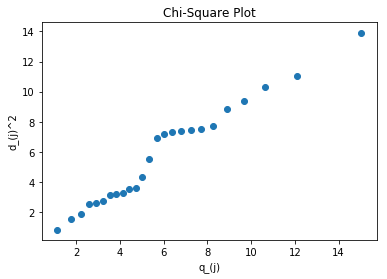

In [23]:
#compute expectation
exp=np.array([X['x1'][:]-xmean['x1'],X['x2'][:]-xmean['x2'],X['x3'][:]-xmean['x3'],X['x4'][:]-xmean['x4'],X['x5'][:]-xmean['x5'],X['x6'][:]-xmean['x6']])

#transpose
exptr=exp.transpose()

#compute d_j^2 following the formula used above
sqdist=list(map(lambda i: np.matmul(np.matmul(exptr[i,:],invS),exp[:,i]), np.arange(25)))
sqdist = pd.DataFrame({'d_j^2': sqdist})

#order d_(j)^2
sqdist=sqdist.sort_values(by=['d_j^2']).reset_index(drop=True)
q=q.sort_values(by=['q_(j)']).reset_index(drop=True)

#create data table
#q=q.reset_index(drop=True)
data=pd.concat([sqdist,q], axis=1)
data.columns=['d_(j)^2','q_(j)']
data.index += 1 
print("\n")
print(data)

#make q-q plot
plt.scatter(data['q_(j)'],data['d_(j)^2'])
plt.title("Chi-Square Plot")
plt.xlabel("q_(j)")
plt.ylabel("d_(j)^2")
plt.show()

This graph suggests multivariate normality even though it does have some curvature in the middle.

\pagebreak

# Exercise 4.35

Examine the data on paper-quality measurements in Table 1.2 for marginal and multivariate normality.

For $\alpha=.05, n\approx 40$, the critical point=.9726

In [24]:
X = pd.read_excel (r'hw3.xlsx', sheet_name='data 435')
X_j=pd.DataFrame(np.sort(X.values, axis=0),columns=X.columns)

#generate q
q=stats.norm.ppf(np.linspace((1-.5)/41,(41-.5)/41,41))
q = pd.DataFrame({'q_(j)': q})

#make table of r_Q
cor = pd.DataFrame(np.array([X_j['Density'].corr(q['q_(j)']), X_j['Machine direction strength'].corr(q['q_(j)']), X_j['Cross direction strength'].corr(q['q_(j)'])]),columns=['r_Q'], index=['Density','Machine direction strength','Cross direction strength'])
print(cor)

                                 r_Q
Density                     0.899468
Machine direction strength  0.990489
Cross direction strength    0.922698


For density and cross direction strength we reject the hypothesis of normality, for machine direction strength we fail to reject.

Multivariate normality:

In [25]:
#generate q_(j)
q=stats.chi2.ppf(np.linspace(1-(40+.5)/41,1-(.5)/41,41),3)
q = pd.DataFrame({'q_(j)': q})

xmean=X.mean(axis = 0) 
print("x-mean:")
print(xmean)

#strip data
x=X.to_numpy()
print("\nX:")

x-mean:
Density                         0.811854
Machine direction strength    120.953415
Cross direction strength       67.723171
dtype: float64

X:


$$S=\frac{1}{n-1}(\bf{X-1\bar{x}^T})^T(\bf{X-1\bar{x}^T})$$

In [26]:
R=x-np.ones((41,1))*[0.811854,120.953415,67.723171]
S=1/40*(np.matmul(R.transpose(),R))
print('S:')
print(S)

invS=np.linalg.inv(S)
print('\nS^(-1):')
print(invS)

S:
[[1.26457805e-03 1.68446762e-01 2.25247976e-01]
 [1.68446762e-01 5.93211480e+01 6.09925314e+01]
 [2.25247976e-01 6.09925314e+01 9.58566672e+01]]

S^(-1):
[[ 1.41942931e+03 -1.73855447e+00 -2.22921103e+00]
 [-1.73855447e+00  5.08807154e-02 -2.82895060e-02]
 [-2.22921103e+00 -2.82895060e-02  3.36708332e-02]]


$$d_j^2=(\bf{x_j-\bar{x}})^T S^{-1}(\bf{x_j-\bar{x}})$$

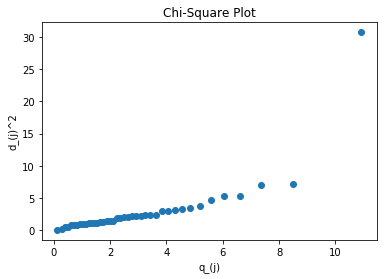

In [27]:
#compute expectation
exp=np.array([X['Density'][:]-xmean['Density'],X['Machine direction strength'][:]-xmean['Machine direction strength'],X['Cross direction strength'][:]-xmean['Cross direction strength']])

#transpose
exptr=exp.transpose()

#compute d_j^2 following the formula used above
sqdist=list(map(lambda i: np.matmul(np.matmul(exptr[i,:],invS),exp[:,i]), np.arange(41)))
sqdist = pd.DataFrame({'d_j^2': sqdist})

#order d_(j)^2
sqdist=sqdist.sort_values(by=['d_j^2']).reset_index(drop=True)

#create data table
q=q.reset_index(drop=True)
data=pd.concat([sqdist,q], axis=1)
data.columns=['d_(j)^2','q_(j)']
data.index += 1 
#print("\n")
#print(data)

#make q-q plot
plt.scatter(data['q_(j)'],data['d_(j)^2'])
plt.title("Chi-Square Plot")
plt.xlabel("q_(j)")
plt.ylabel("d_(j)^2")
plt.show()

This graph seems to have a linear trendline, although it does contains an outlier, the remainder of the data is consistent.

\pagebreak

# Exercise 4.39

The data in Table 4.6 consist of 130 observations generated by scores on a psychological test administered to Peruvian teenagers. For each of these teenagers the gender (male=1, female=2) and socioeconomic status (low=1, medium=2) were also recorded. The scores were accumulated into five subscale scores labeled independence, support, benevolence, conformity, and leadership.

## (a) Examine each of the variables independence, support, benevolence, conformity, and leadership for marginal normality.

For $\alpha=.05, n=130$, the critical point=.990

In [28]:
X = pd.read_excel (r'hw3.xlsx', sheet_name='data 439', usecols=['Indep','Supp','Benev','Conform','Leader'])
X_j=pd.DataFrame(np.sort(X.values, axis=0),columns=X.columns)

#generate q
q=stats.norm.ppf(np.linspace((1-.5)/130,(130-.5)/130,130))
q = pd.DataFrame({'q_(j)': q})

#make table of r_Q
cor = pd.DataFrame(np.array([X_j['Indep'].corr(q['q_(j)']), X_j['Supp'].corr(q['q_(j)']), X_j['Benev'].corr(q['q_(j)']), X_j['Conform'].corr(q['q_(j)']), X_j['Leader'].corr(q['q_(j)'])]),columns=['r_Q'], index=['Indep','Supp','Benev','Conform','Leader'])
print(cor)

              r_Q
Indep    0.988130
Supp     0.989288
Benev    0.992509
Conform  0.993380
Leader   0.981289


For independence, support, and leadership you reject the hypothesis of normality. For benevolence and conformity you fail to reject.

## (b) Using all five variables, check for multivariate normality.

In [29]:
#generate q_(j)
q=stats.chi2.ppf(np.linspace(1-(129+.5)/130,1-(.5)/130,130),5)
q = pd.DataFrame({'q_(j)': q})

xmean=X.mean(axis = 0) 
print("x-mean:")
print(xmean)

#strip data
x=X.to_numpy()

x-mean:
Indep      15.669231
Supp       17.076923
Benev      18.784615
Conform    15.500000
Leader     11.730769
dtype: float64


$$S=\frac{1}{n-1}(\bf{X-1\bar{x}^T})^T(\bf{X-1\bar{x}^T})$$

In [30]:
R=x-np.ones((130,1))*[15.669231,17.076923,18.784615,15.500000,11.730769]
S=1/130*(np.matmul(R.transpose(),R))
print('S:')
print(S)

invS=np.linalg.inv(S)
print('\nS^(-1):')
print(invS)

S:
[[ 34.48289941  -4.24378698 -17.93278107 -15.85         5.67248521]
 [ -4.24378698  17.37869822   0.41656805  -7.80769231  -8.65621302]
 [-17.93278107   0.41656805  29.61514793   9.27692308 -13.83491124]
 [-15.85        -7.80769231   9.27692308  32.78846154  -9.86538462]
 [  5.67248521  -8.65621302 -13.83491124  -9.86538462  26.75059172]]

S^(-1):
[[0.09179906 0.08217541 0.06404794 0.06516334 0.06428112]
 [0.08217541 0.17213856 0.06853816 0.09392641 0.10836279]
 [0.06404794 0.06853816 0.09170085 0.04295921 0.07186578]
 [0.06516334 0.09392641 0.04295921 0.09435168 0.07358946]
 [0.06428112 0.10836279 0.07186578 0.07358946 0.12312336]]


$$d_j^2=(\bf{x_j-\bar{x}})^T S^{-1}(\bf{x_j-\bar{x}})$$

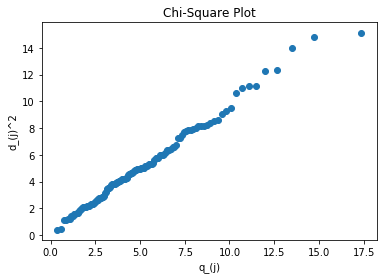

In [31]:
#compute expectation
exp=np.array([X['Indep'][:]-xmean['Indep'],X['Supp'][:]-xmean['Supp'],X['Benev'][:]-xmean['Benev'],X['Conform'][:]-xmean['Conform'],X['Leader'][:]-xmean['Leader']])

#transpose
exptr=exp.transpose()

#compute d_j^2 following the formula used above
sqdist=list(map(lambda i: np.matmul(np.matmul(exptr[i,:],invS),exp[:,i]), np.arange(130)))
sqdist = pd.DataFrame({'d_j^2': sqdist})

#order d_(j)^2
sqdist=sqdist.sort_values(by=['d_j^2']).reset_index(drop=True)

#create data table
q=q.reset_index(drop=True)
data=pd.concat([sqdist,q], axis=1)
data.columns=['d_(j)^2','q_(j)']
data.index += 1 

#make q-q plot
plt.scatter(data['q_(j)'],data['d_(j)^2'])
plt.title("Chi-Square Plot")
plt.xlabel("q_(j)")
plt.ylabel("d_(j)^2")
plt.show()

The data is very linear, but there is one outlier on the top right.

\pagebreak

# Exercise 4.40

Consider the data on national parks in Exercise 1.27

## (a) Comment on any possible outliers in a scatter plot of the original variables.

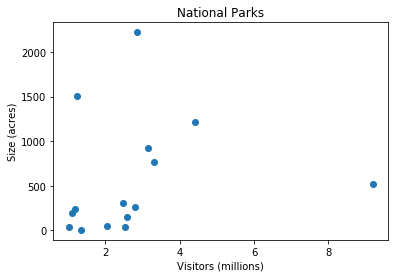

In [32]:
x = pd.read_excel (r'hw3.xlsx', sheet_name='data 440')

#make scatter plot
plt.scatter(x['Visitors (millions)'],x['Size (acres)'])
plt.title("National Parks")
plt.xlabel("Visitors (millions)")
plt.ylabel("Size (acres)")
plt.show()

There are a couple of present outliers in this data - like the rightmost data point with a smaller-end size but the most visitors out of any park, and the two top left points which have a large size yet have a small number of visitors relative to their size.

## (b) Determine the power transformation $\hat{\lambda_1}$ that makes the $x_1$ values approximately normal. Construct a Q-Q plot for the transformed data.

For $\alpha=.05, n=15$, the critical point=.9389

In [33]:
#order x1
x1=x.sort_values(by=['Size (acres)']).reset_index(drop=True)

#generate q
q=stats.norm.ppf(np.linspace((1-.5)/15,(15-.5)/15,15))
q = pd.DataFrame({'q_(j)': q})

#correlation coeff
print("r_Q for size:",x1['Size (acres)'].corr(q['q_(j)']))

r_Q for size: 0.9038568994710187


Since $r_Q<.9389$ we must reject the hypothesis of normality, meaning that we must apply a power transformation to make the observations nearly normal.

In [34]:
print(stats.boxcox(x1['Size (acres)']))

(array([ 2.04735893,  5.00615565,  5.17445509,  5.75396755,  8.43367424,
        9.26626307,  9.74795747, 10.10190751, 10.5655924 , 12.24250207,
       13.57006096, 14.28429614, 15.362147  , 16.23677623, 17.90797715]), 0.19494669074842255)


The optimal power transformation for this given data is $\hat\lambda_1=0.1949$

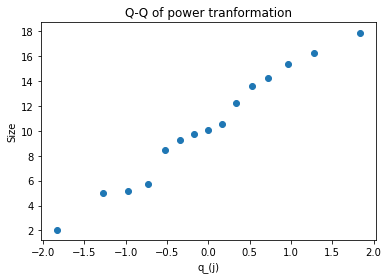

Transformed r_Q for size: 0.9907670933762295


In [35]:
#store boxcox tr data
trdata1=np.array([ 2.04735893,  5.00615565,  5.17445509,  5.75396755,  8.43367424,
        9.26626307,  9.74795747, 10.10190751, 10.5655924 , 12.24250207,
       13.57006096, 14.28429614, 15.362147  , 16.23677623, 17.90797715])


#make q-q plot
plt.scatter(q['q_(j)'],trdata1)
plt.title("Q-Q of power tranformation")
plt.xlabel("q_(j)")
plt.ylabel("Size")
plt.show()

print("Transformed r_Q for size:",np.corrcoef(trdata1,q['q_(j)'])[1, 0])

The transformed data both follows a linear slope and has an r_Q that fails to reject the hypothesis of normality.

## (c) Determine the power transformation $\hat{\lambda_2}$ that makes the $x_2$ values approximately normal. Construct a Q-Q plot for the transformed data.

In [36]:
#order x2
x2=x.sort_values(by=['Visitors (millions)']).reset_index(drop=True)

#correlation coeff
print("r_Q for size:",x2['Visitors (millions)'].corr(q['q_(j)']))

r_Q for size: 0.8407643940458719


Since $r_Q<.9389$ we must reject the hypothesis of normality, meaning that we must apply a power transformation to make the observations nearly normal.

In [37]:
print(stats.boxcox(x2['Visitors (millions)']))

(array([0.01973501, 0.08490682, 0.15281953, 0.19978117, 0.27835272,
       0.63571295, 0.77358147, 0.79403754, 0.81097435, 0.86633253,
       0.8762452 , 0.94504807, 0.9782269 , 1.15947382, 1.54910716]), -0.3456572326530909)


The optimal power transformation for this given data is $\hat\lambda_2=-0.3457$

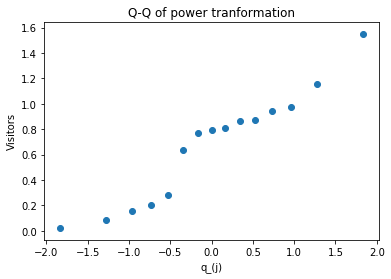

Transformed r_Q for visitors: 0.9674660302071684


In [38]:
#store boxcox tr data
trdata2=np.array([0.01973501, 0.08490682, 0.15281953, 0.19978117, 0.27835272,
       0.63571295, 0.77358147, 0.79403754, 0.81097435, 0.86633253,
       0.8762452 , 0.94504807, 0.9782269 , 1.15947382, 1.54910716])


#make q-q plot
plt.scatter(q['q_(j)'],trdata2)
plt.title("Q-Q of power tranformation")
plt.xlabel("q_(j)")
plt.ylabel("Visitors")
plt.show()

print("Transformed r_Q for visitors:",np.corrcoef(trdata2,q['q_(j)'])[1, 0])

The transformed data follows a linear slope but it shows some curvature in the middle, although it does has an r_Q that fails to reject the hypothesis of normality.

## (d) Determine the power transformation for approximate bivariate normality.

Using $\hat\lambda^T=[\hat\lambda_1, \hat\lambda_2]=[0.1949,−0.3457]$

In [39]:
x=pd.DataFrame([trdata1,trdata2],index=['Size (acres)','Visitors (millions)'])
xmean=x.mean(axis = 1) 
print("x-mean:")
print(xmean)

#generate q_(j)
q=stats.chi2.ppf(np.linspace(1-(14+.5)/15,1-(.5)/15,15),2)
q = pd.DataFrame({'q_(j)': q})

#strip data
x=x.to_numpy().transpose()

x-mean:
Size (acres)           10.380073
Visitors (millions)     0.674956
dtype: float64


$$S=\frac{1}{n-1}(\bf{X-1\bar{x}^T})^T(\bf{X-1\bar{x}^T})$$

In [40]:
R=x-np.ones((15,1))*[10.380073,0.674956]
S=1/14*(np.matmul(R.transpose(),R))
print('S:')
print(S)

invS=np.linalg.inv(S)
print('\nS^(-1):')
print(invS)

S:
[[21.21655883  1.94817695]
 [ 1.94817695  0.1941497 ]]

S^(-1):
[[ 0.59960661 -6.01669625]
 [-6.01669625 65.52463833]]


$$d_j^2=(\bf{x_j-\bar{x}})^T S^{-1}(\bf{x_j-\bar{x}})$$

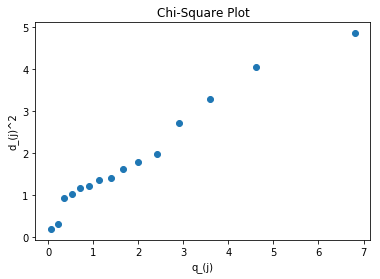

In [41]:
#compute expectation
exp=np.array([x[:,0]-xmean['Size (acres)'],x[:,1]-xmean['Visitors (millions)']])

#transpose
exptr=exp.transpose()

#compute d_j^2 following the formula used above
sqdist=list(map(lambda i: np.matmul(np.matmul(exptr[i,:],invS),exp[:,i]), np.arange(15)))
sqdist = pd.DataFrame({'d_j^2': sqdist})

#order d_(j)^2
sqdist=sqdist.sort_values(by=['d_j^2']).reset_index(drop=True)

#create data table
q=q.reset_index(drop=True)
data=pd.concat([sqdist,q], axis=1)
data.columns=['d_(j)^2','q_(j)']
data.index += 1 

#make q-q plot
plt.scatter(data['q_(j)'],data['d_(j)^2'])
plt.title("Chi-Square Plot")
plt.xlabel("q_(j)")
plt.ylabel("d_(j)^2")
plt.show()

Since this graph is linear, it can be verified that $\hat\lambda^T=[\hat\lambda_1, \hat\lambda_2]=[0.1949,−0.3457]$ is a valid power transformation for bivariate normality.

\pagebreak

# Exercise 4.41

Consider the data on snow removal in Exercise 3.20

## (a) Comment on any possible outliers in a scatter plot of the original variables.

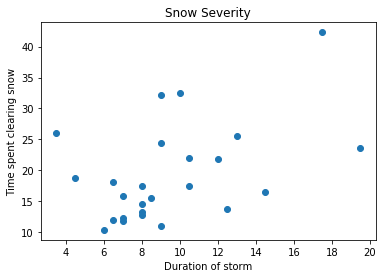

In [42]:
x = pd.read_excel (r'hw3.xlsx', sheet_name='data 441')

#make scatter plot
plt.scatter(x['x1'],x['x2'])
plt.title("Snow Severity")
plt.xlabel("Duration of storm")
plt.ylabel("Time spent clearing snow")
plt.show()

Potential outliers for this data include the two rightmost data points for which the storm lasted a very long time and whose time to clear the remaining snow did not match the other data points. Another potential outlier is the leftmost point for which the storm lasted a very short amount yet took a long time to clean up. It is difficult to determine outliers for this data visually from a scatterplot because the data has a large spread.

## (b) Determine the power transformation $\hat{\lambda_1}$ that makes the $x_1$ values approximately normal. Construct a Q-Q plot for the transformed data.

For $\alpha=.05, n=25$, the critical point=.9591

In [43]:
#order x1
x1=x.sort_values(by=['x1']).reset_index(drop=True)

#generate q
q=stats.norm.ppf(np.linspace((1-.5)/25,(25-.5)/25,25))
q = pd.DataFrame({'q_(j)': q})

#correlation coeff
print("r_Q for duration of storm:",x1['x1'].corr(q['q_(j)']))

r_Q for duration of storm: 0.9561249153125893


Since $r_Q<.9591$ we must reject the hypothesis of normality, meaning that we must apply a power transformation to make the observations nearly normal.

In [44]:
print(stats.boxcox(x1['x1']))

(array([1.29651682, 1.56743905, 1.88215549, 1.97060101, 1.97060101,
       2.05283345, 2.05283345, 2.05283345, 2.20184483, 2.20184483,
       2.20184483, 2.20184483, 2.26985626, 2.33418527, 2.33418527,
       2.33418527, 2.45328977, 2.50867658, 2.50867658, 2.66101722,
       2.7078111 , 2.7528676 , 2.87882357, 3.09749714, 3.22435116]), 0.05449652950256707)


The optimal power transformation for this given data is $\hat\lambda_1=0.05450$

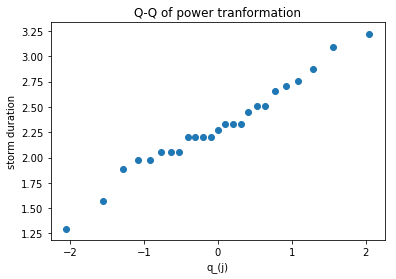

Transformed r_Q for storm duration: 0.9874809079476178


In [45]:
#store boxcox tr data
trdata1=np.array([1.29651682, 1.56743905, 1.88215549, 1.97060101, 1.97060101,
       2.05283345, 2.05283345, 2.05283345, 2.20184483, 2.20184483,
       2.20184483, 2.20184483, 2.26985626, 2.33418527, 2.33418527,
       2.33418527, 2.45328977, 2.50867658, 2.50867658, 2.66101722,
       2.7078111 , 2.7528676 , 2.87882357, 3.09749714, 3.22435116])


#make q-q plot
plt.scatter(q['q_(j)'],trdata1)
plt.title("Q-Q of power tranformation")
plt.xlabel("q_(j)")
plt.ylabel("storm duration")
plt.show()

print("Transformed r_Q for storm duration:",np.corrcoef(trdata1,q['q_(j)'])[1, 0])

The transformed data both follows a linear slope and has an r_Q that fails to reject the hypothesis of normality.

## (c) Determine the power transformation $\hat{\lambda_2}$ that makes the $x_2$ values approximately normal. Construct a Q-Q plot for the transformed data.

In [46]:
#order x2
x2=x.sort_values(by=['x2']).reset_index(drop=True)

#correlation coeff
print("r_Q for cleanup duration:",x2['x2'].corr(q['q_(j)']))

r_Q for cleanup duration: 0.9389701775230993


Since $r_Q>.9591$ we fail to reject the hypothesis of normality, and so $\hat\lambda_2=1$.

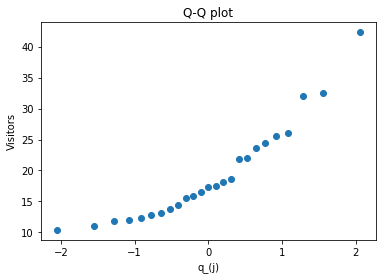

In [47]:
#make q-q plot
plt.scatter(q['q_(j)'],x2['x2'])
plt.title("Q-Q plot")
plt.xlabel("q_(j)")
plt.ylabel("Visitors")
plt.show()

## (d) Determine the power transformation for approximate bivariate normality.

Using $\hat\lambda^T=[\hat\lambda_1, \hat\lambda_2]=[0.05450,1]$

In [48]:
x=pd.DataFrame([trdata1,x2['x2']],index=['Storm Duration','Snow Cleanup'])
xmean=x.mean(axis = 1) 
print("x-mean:")
print(xmean)

#generate q_(j)
q=stats.chi2.ppf(np.linspace(1-(24+.5)/25,1-(.5)/25,25),2)
q = pd.DataFrame({'q_(j)': q})

#strip data
x=x.to_numpy().transpose()

x-mean:
Storm Duration     2.308745
Snow Cleanup      19.272000
dtype: float64


$$S=\frac{1}{n-1}(\bf{X-1\bar{x}^T})^T(\bf{X-1\bar{x}^T})$$

In [49]:
R=x-np.ones((25,1))*[2.308745,19.272000]
S=1/24*(np.matmul(R.transpose(),R))
print('S:')
print(S)

invS=np.linalg.inv(S)
print('\nS^(-1):')
print(invS)

S:
[[ 0.19155523  3.22000866]
 [ 3.22000866 62.23876667]]

S^(-1):
[[40.05828518 -2.07247078]
 [-2.07247078  0.1232893 ]]


$$d_j^2=(\bf{x_j-\bar{x}})^T S^{-1}(\bf{x_j-\bar{x}})$$

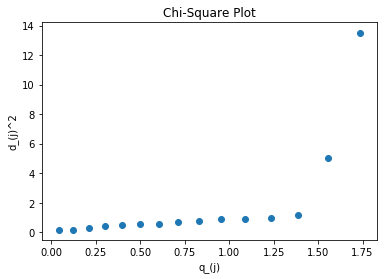

In [50]:
#compute expectation
exp=np.array([x[:,0]-xmean['Storm Duration'],x[:,1]-xmean['Snow Cleanup']])

#transpose
exptr=exp.transpose()

#compute d_j^2 following the formula used above
sqdist=list(map(lambda i: np.matmul(np.matmul(exptr[i,:],invS),exp[:,i]), np.arange(15)))
sqdist = pd.DataFrame({'d_j^2': sqdist})

#order d_(j)^2
sqdist=sqdist.sort_values(by=['d_j^2']).reset_index(drop=True)

#create data table
q=q.reset_index(drop=True)
data=pd.concat([sqdist,q], axis=1)
data.columns=['d_(j)^2','q_(j)']
data.index += 1 

#make q-q plot
plt.scatter(data['q_(j)'],data['d_(j)^2'])
plt.title("Chi-Square Plot")
plt.xlabel("q_(j)")
plt.ylabel("d_(j)^2")
plt.show()

This graph is very linear, with the exception of the two rightmost end points that are huge outliers. This verifies that the optimal power transformation for bivariate normality $\hat\lambda^T=[\hat\lambda_1, \hat\lambda_2]=[0.05450,1]$.